In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_analysis_config import col_name_map, TYPES_COLUMN_NAMES, categorize_by_quantile
from itertools import chain
import glob
import os


## **PRE-WORK**
### PREPARE DATA
1. Load data
2. Rename columns
3. Delete non-numeric columns


In [4]:
# load dataframe
key_df = pd.read_csv('../csv_output/key_misspells.csv', sep=';')
fp_df = pd.read_csv('../csv_output/fp.csv', sep=';')
rand_df = pd.read_csv('../csv_output/rand_misspells.csv', sep=';')

fp_df['amount_of_errors'] = 0

# rename dataframe
fp_df.rename(columns=col_name_map, inplace=True)
key_df.rename(columns=col_name_map, inplace=True)
rand_df.rename(columns=col_name_map, inplace=True)

In [26]:
key_df['Bucket'] = key_df['Amount of misspells (in input sentence)'].apply(lambda x: 1 if x < 3 else ( 2 if 3 <= x <= 5 else 3))
rand_df['Bucket'] = key_df['Amount of misspells (in input sentence)'].apply(lambda x: 1 if x < 3 else ( 2 if 3 <= x <= 5 else 3))
fp_df['Bucket'] = 0

In [27]:
key_based_dataframes = [key_df.loc[key_df['Bucket'] == i].reset_index(drop=True) for i in range(1, 4)]
rand_based_dataframe = [rand_df.loc[rand_df['Bucket'] == i].reset_index(drop=True)  for i in range(1, 4)]
# del key_df, rand_df


In [30]:
key = key_df.groupby(by='Bucket').Time.describe()
key.index = ["QE" + str(k) for k in key.index]

rand = rand_df.groupby(by='Bucket').Time.describe()
rand.index = ["RE" + str(k) for k in key.index]
fp = fp_df.Time.describe().transpose()
fp = fp_df.groupby(by='Bucket').Time.describe()
# fp.index = ["FP" + str(k) for k in key.index]


pd.concat([rand, key, fp], axis =0)



,count,mean,std,min,25%,50%,75%,max
REQE1,23594.0,0.472023,0.300365,0.000043,0.338368,0.450579,0.623909,3.090741
REQE2,35235.0,0.578320,1.432270,0.000037,0.378070,0.537295,0.753027,260.066470
REQE3,11715.0,0.653513,0.429567,0.000148,0.399673,0.608124,0.862875,11.601049
QE1,23594.0,0.475283,0.308287,0.000064,0.338126,0.457341,0.637228,6.808192
QE2,35235.0,0.574035,0.383181,0.000146,0.375419,0.543296,0.756560,10.950917
QE3,11715.0,0.663971,0.844798,0.000288,0.403036,0.622520,0.867169,79.899765
0,11805.0,0.401162,0.277015,0.000069,0.306253,0.390997,0.504153,10.254752


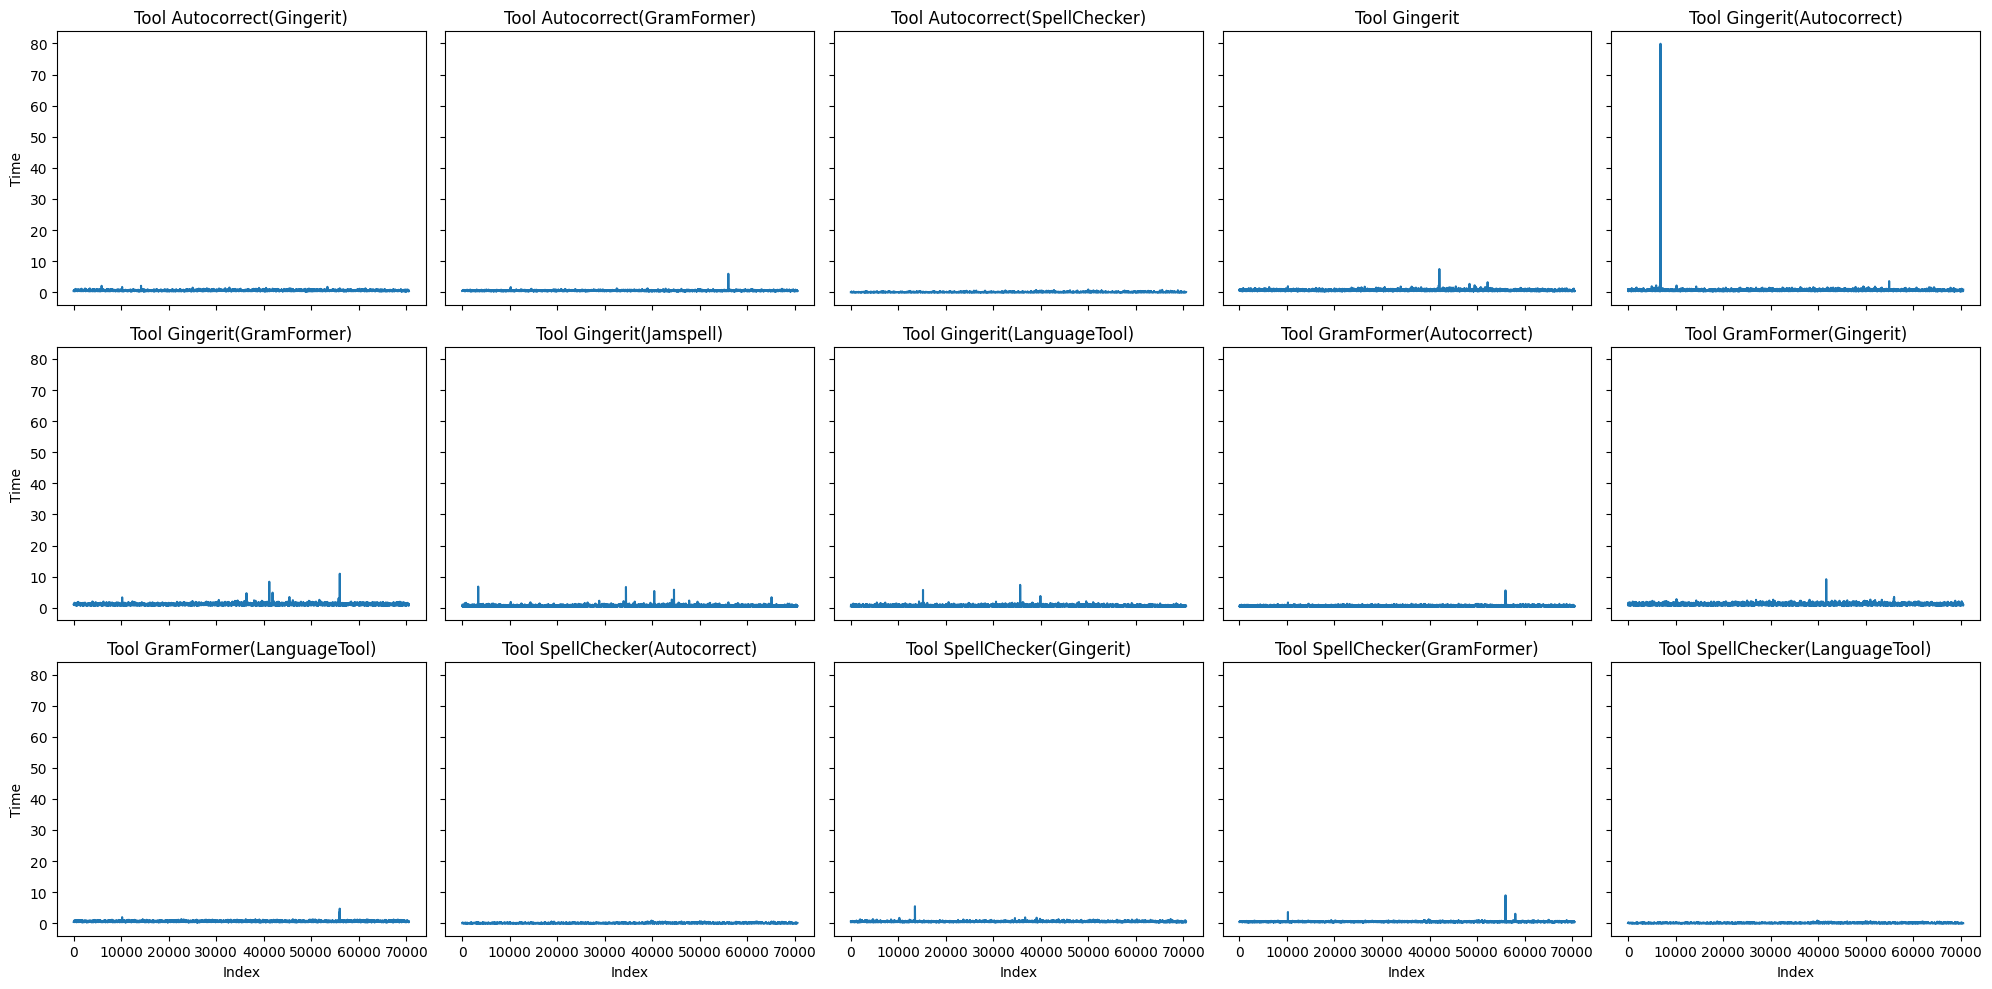

In [ ]:
# Define the number of rows and columns for the subplots
rows = 3
cols = 5

# Calculate the total number of subplots
num_subplots = rows * cols

# Create a figure and an array of subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 10), sharex=True, sharey=True)

# Initialize the subplot index
subplot_idx = 0

for tool, tool_data in grouped_data:
    # Calculate the row and column index for the current subplot
    row_idx = subplot_idx // cols
    col_idx = subplot_idx % cols
    
    # Plot the time analysis for the current tool
    tool_data['Time'].plot(ax=axes[row_idx, col_idx], title=f"Tool {tool}")
    axes[row_idx, col_idx].set_xlabel("Index")
    axes[row_idx, col_idx].set_ylabel("Time")
    
    # Increment the subplot index
    subplot_idx += 1

# Remove unused subplots
for i in range(subplot_idx, num_subplots):
    row_idx = i // cols
    col_idx = i % cols
    axes[row_idx, col_idx].remove()

# Adjust the layout and show the plot
fig.tight_layout()
plt.show()